In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "svg"

In [2]:
ds_raw=pd.read_csv("Zomato Chennai Listing 2020.csv")

In [3]:
ds_raw.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


## Getting basic information aboout dataset...

In [4]:
ds_raw.shape

(12032, 12)

In [5]:
ds_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          6681 non-null   float64
 8   Dining Rating Count    11812 non-null  object 
 9   Delivery Rating        6181 non-null   float64
 10  Delivery Rating Count  11812 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.1+ MB


In [6]:
ds_raw.describe()

,Price for 2,Dining Rating,Delivery Rating
count,12032.000000,6681.000000,6181.000000
mean,397.611370,3.387756,3.805290
std,332.045938,0.558181,0.374213
min,40.000000,0.300000,0.300000
25%,200.000000,3.100000,3.600000
50%,300.000000,3.500000,3.900000
75%,450.000000,3.800000,4.000000
max,5000.000000,4.900000,4.700000


# Cleaning the dataset...

## 1. Checking the redundant rows of data

In [7]:
dupe_data=ds_raw.duplicated()
ds_raw[dupe_data]

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features


### No Dupicate rows...

## 2. Removing the NULL records... 

In [8]:
# Checking for Null records...
ds_raw.isnull().sum()

Zomato URL                  0
Name of Restaurant          0
Address                     0
Location                    0
Cuisine                     0
Top Dishes                  0
Price for 2                 0
Dining Rating            5351
Dining Rating Count       220
Delivery Rating          5851
Delivery Rating Count     220
Features                    0
dtype: int64

## Checking the Data types...

In [9]:
ds_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          6681 non-null   float64
 8   Dining Rating Count    11812 non-null  object 
 9   Delivery Rating        6181 non-null   float64
 10  Delivery Rating Count  11812 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.1+ MB


## ###Conversion of datatypes and handling the NULL records

In [10]:
###Conversion of datatypes and handling the NULL records

#ds_raw["Dining Rating"]=ds_raw["Dining Rating"].fillna(0)
#ds_raw["Dining Rating Count"]=ds_raw["Dining Rating Count"].fillna(0)
#ds_raw["Delivery Rating"]=ds_raw["Delivery Rating"].fillna(0)
#ds_raw["Delivery Rating Count"]=ds_raw["Delivery Rating Count"].fillna(0)

ds_raw['Dining Rating'] = pd.to_numeric(ds_raw['Dining Rating'], errors='coerce')
ds_raw['Dining Rating'] = ds_raw['Dining Rating'].fillna(0)
ds_raw['Dining Rating'] = ds_raw['Dining Rating'].astype('float64')

ds_raw['Dining Rating Count'] = pd.to_numeric(ds_raw['Dining Rating Count'], errors='coerce')
ds_raw['Dining Rating Count'] = ds_raw['Dining Rating Count'].fillna(0)
ds_raw['Dining Rating Count'] = ds_raw['Dining Rating Count'].astype('float64')

ds_raw['Delivery Rating'] = pd.to_numeric(ds_raw['Delivery Rating'], errors='coerce')
ds_raw['Delivery Rating'] = ds_raw['Delivery Rating'].fillna(0)
ds_raw['Delivery Rating'] = ds_raw['Delivery Rating'].astype('float64')

ds_raw['Delivery Rating Count'] = pd.to_numeric(ds_raw['Delivery Rating Count'], errors='coerce')
ds_raw['Delivery Rating Count'] = ds_raw['Delivery Rating Count'].fillna(0)
ds_raw['Delivery Rating Count'] = ds_raw['Delivery Rating Count'].astype('float64')

ds_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          12032 non-null  float64
 8   Dining Rating Count    12032 non-null  float64
 9   Delivery Rating        12032 non-null  float64
 10  Delivery Rating Count  12032 non-null  float64
 11  Features               12032 non-null  object 
dtypes: float64(5), object(7)
memory usage: 1.1+ MB


In [11]:
ds_raw

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500.0,4.3,9306.0,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059.0,4.1,39200.0,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361.0,4.4,10500.0,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101.0,4.0,11200.0,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617.0,4.1,22400.0,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...,...,...
12027,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Porur,['Sandwich'],Invalid,350.0,0.0,0.0,0.0,0.0,"['Breakfast', 'Delivery Only']"
12028,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Kolathur,['Sandwich'],Invalid,350.0,0.0,0.0,0.0,0.0,"['Breakfast', 'Delivery Only']"
12029,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Anna Nagar East,['Sandwich'],Invalid,350.0,0.0,0.0,0.0,0.0,"['Breakfast', 'Delivery Only']"
12030,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Ramapuram,['Sandwich'],Invalid,350.0,0.0,0.0,0.0,0.0,"['Breakfast', 'Delivery Only']"


In [12]:
# Removing the Brackets from the "Top_Dishes" column
ds_raw["Top Dishes"]=ds_raw["Top Dishes"].str.replace('[','')
ds_raw["Top Dishes"]=ds_raw["Top Dishes"].str.replace(']','')
ds_raw["Cuisine"]=ds_raw["Cuisine"].str.replace('[','')
ds_raw["Cuisine"]=ds_raw["Cuisine"].str.replace(']','')
ds_raw["Features"]=ds_raw["Features"].str.replace('[','')
ds_raw["Features"]=ds_raw["Features"].str.replace(']','')

ds_raw.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,'Biryani',"'Bread Halwa', ' Chicken 65', ' Mutton Biryani...",500.0,4.3,1500.0,4.3,9306.0,"'Home Delivery', 'Indoor Seating'"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"'Biryani', ' North Indian', ' Mughlai', ' Dess...","'Beef Biryani', ' Beef Fry', ' Paratha', ' Pay...",1000.0,4.4,3059.0,4.1,39200.0,"'Home Delivery', 'Free Parking', 'Table bookin..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"'Biryani', ' North Indian', ' Chinese', ' Arab...","'Brinjal Curry', ' Tandoori Chicken', ' Chicke...",500.0,4.3,1361.0,4.4,10500.0,"'Home Delivery', 'Indoor Seating'"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"'Burger', ' Fast Food', ' Finger Food', ' Beve...",'Zinger Burger',500.0,4.0,1101.0,4.0,11200.0,"'Home Delivery', 'Free Parking', 'Card Upon De..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"'Chinese', ' Biryani', ' North Indian', ' Chet...","'Mutton Biryani', ' Chicken Rice', ' Tomato Ri...",450.0,4.2,617.0,4.1,22400.0,"'Home Delivery', 'Indoor Seating'"


## Removing the restaurant records whose Dining Rating or Delivery Rating is 0

In [13]:
ds_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          12032 non-null  float64
 8   Dining Rating Count    12032 non-null  float64
 9   Delivery Rating        12032 non-null  float64
 10  Delivery Rating Count  12032 non-null  float64
 11  Features               12032 non-null  object 
dtypes: float64(5), object(7)
memory usage: 1.1+ MB


In [14]:
ds_raw.shape

(12032, 12)

In [15]:
useless_records=(ds_raw["Dining Rating"]==0) | (ds_raw["Delivery Rating"]==0)
ds_raw[useless_records]

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
6,https://www.zomato.com/chennai/bai-veetu-kalya...,Bai Veetu Kalyanam,"1/187, Thalambur Road, Navallur, Chennai",Navallur,'Biryani',"'Bread Halwa', ' Mutton Biryani', ' Brinjal Gr...",350.0,0.0,0.0,4.3,1061.0,'Home Delivery'
15,https://www.zomato.com/chennai/welcome-hotel-p...,Welcome Hotel,"112/241, Purasawalkam High Road, Purasavakkam...",Purasavakkam,"'South Indian', ' Desserts', ' Beverages'","'Pongal', ' Podi Dosa', ' Idli Sambar', ' Vada...",300.0,4.5,1094.0,0.0,0.0,"'Breakfast', 'Vegetarian Only', 'Indoor Seating'"
18,https://www.zomato.com/chennai/wire-room-bar-k...,Wire Room Bar & Kitchen,"142, Phoenix Marketcity, New NGO Colony, Vela...","Phoenix Market City, Velachery","'Continental', ' Asian'","'Cocktails', ' Salad', ' Beer', ' Tikka', ' Po...",2000.0,4.1,354.0,0.0,0.0,"'Full Bar Available', 'Mall Parking', 'Dance F..."
23,https://www.zomato.com/chennai/bff-2-0-ra-puram,BFF 2.0,"80/29, 2nd Main Road, RA Puram, Chennai",RA Puram,"'North Indian', ' Continental', ' Italian'","'Crispy Chicken', ' Cocktails', ' Pizza', ' Na...",1500.0,4.2,464.0,0.0,0.0,"'Full Bar Available', 'Indoor Seating', 'Night..."
77,https://www.zomato.com/chennai/al-dhareeq-beef...,Al Dhareeq Beef Biriyani,"64/A, 162, Sivan Kovil South Street, Kodambak...",Kodambakkam,'Biryani','Beef Biryani',300.0,0.0,0.0,3.9,19600.0,'Home Delivery'
...,...,...,...,...,...,...,...,...,...,...,...,...
12027,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Porur,'Sandwich',Invalid,350.0,0.0,0.0,0.0,0.0,"'Breakfast', 'Delivery Only'"
12028,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Kolathur,'Sandwich',Invalid,350.0,0.0,0.0,0.0,0.0,"'Breakfast', 'Delivery Only'"
12029,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Anna Nagar East,'Sandwich',Invalid,350.0,0.0,0.0,0.0,0.0,"'Breakfast', 'Delivery Only'"
12030,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Ramapuram,'Sandwich',Invalid,350.0,0.0,0.0,0.0,0.0,"'Breakfast', 'Delivery Only'"


## NO records whose Dining Rating or Delivery Rating is 0

In [16]:
# removing the restaurant records whose Dining Rating or Delivery Rating is 0
## Performing Negation of the useless dataset and then storing the correct data back in the ds_raw DataFrame
## This permamnently remove the wrong data from the original dataframe

#ds_raw=ds_raw[~useless_records]
#ds_raw

In [17]:
zomato_df=ds_raw.copy()
zomato_df

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,'Biryani',"'Bread Halwa', ' Chicken 65', ' Mutton Biryani...",500.0,4.3,1500.0,4.3,9306.0,"'Home Delivery', 'Indoor Seating'"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"'Biryani', ' North Indian', ' Mughlai', ' Dess...","'Beef Biryani', ' Beef Fry', ' Paratha', ' Pay...",1000.0,4.4,3059.0,4.1,39200.0,"'Home Delivery', 'Free Parking', 'Table bookin..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"'Biryani', ' North Indian', ' Chinese', ' Arab...","'Brinjal Curry', ' Tandoori Chicken', ' Chicke...",500.0,4.3,1361.0,4.4,10500.0,"'Home Delivery', 'Indoor Seating'"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"'Burger', ' Fast Food', ' Finger Food', ' Beve...",'Zinger Burger',500.0,4.0,1101.0,4.0,11200.0,"'Home Delivery', 'Free Parking', 'Card Upon De..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"'Chinese', ' Biryani', ' North Indian', ' Chet...","'Mutton Biryani', ' Chicken Rice', ' Tomato Ri...",450.0,4.2,617.0,4.1,22400.0,"'Home Delivery', 'Indoor Seating'"
...,...,...,...,...,...,...,...,...,...,...,...,...
12027,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Porur,'Sandwich',Invalid,350.0,0.0,0.0,0.0,0.0,"'Breakfast', 'Delivery Only'"
12028,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Kolathur,'Sandwich',Invalid,350.0,0.0,0.0,0.0,0.0,"'Breakfast', 'Delivery Only'"
12029,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Anna Nagar East,'Sandwich',Invalid,350.0,0.0,0.0,0.0,0.0,"'Breakfast', 'Delivery Only'"
12030,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Ramapuram,'Sandwich',Invalid,350.0,0.0,0.0,0.0,0.0,"'Breakfast', 'Delivery Only'"


# Performing Exploratory Data Analysis

## Q1) How many restaurants are in chennai for each type of cuisine

In [18]:
restaurant_count = zomato_df.groupby("Cuisine")["Name of Restaurant"].count().reset_index()
restaurant_count



,Cuisine,Name of Restaurant
0,'American',1
1,"'American', ' Andhra', ' Asian', ' Beverages',...",1
2,"'American', ' Arabian', ' Italian', ' Mexican'...",1
3,"'American', ' BBQ'",1
4,"'American', ' Continental'",2
...,...,...
2418,"'Tibetan', ' Mexican', ' North Indian', ' Chin...",1
2419,"'Tibetan', ' Momos'",12
2420,"'Turkish', ' Kebab'",1
2421,'Wraps',1


In [19]:
rest_count_df=restaurant_count.rename(columns={"restaurant_count": "count"})
rest_count_df

,Cuisine,Name of Restaurant
0,'American',1
1,"'American', ' Andhra', ' Asian', ' Beverages',...",1
2,"'American', ' Arabian', ' Italian', ' Mexican'...",1
3,"'American', ' BBQ'",1
4,"'American', ' Continental'",2
...,...,...
2418,"'Tibetan', ' Mexican', ' North Indian', ' Chin...",1
2419,"'Tibetan', ' Momos'",12
2420,"'Turkish', ' Kebab'",1
2421,'Wraps',1


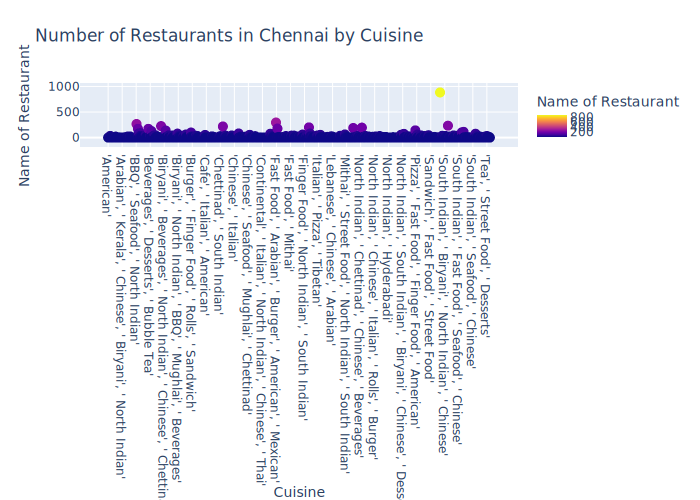

In [20]:
fig = px.scatter(data_frame=rest_count_df, 
             x="Cuisine", 
             y="Name of Restaurant", 
            color="Name of Restaurant" ,
             title="Number of Restaurants in Chennai by Cuisine").update_traces(marker_size=10)

fig.show()

## Which are the Top 10 highest dining rated Fastfood Restaurant in chennai?

In [21]:
fastfood_df=zomato_df[zomato_df["Cuisine"].str.contains('Fast Food')]
fastfood_df.sort_values(by="Dining Rating",ascending=False).head(10)


,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
155,https://www.zomato.com/chennai/the-sandwich-sh...,The Sandwich Shop,"1, Subba Street, West Mambalam, Chennai",West Mambalam,"'Sandwich', ' Fast Food', ' Beverages'","'Mocktails', ' Fries', ' Pizza Sandwich', ' Ta...",300.0,4.9,584.0,4.4,895.0,"'Home Delivery', 'Vegetarian Only', 'Bulk Orde..."
75,https://www.zomato.com/chennai/fusilli-reasons...,Fusilli Reasons,"2/64, Ormes Main Road, Kilpauk, Chennai",Kilpauk,'Fast Food',"'Nachos', ' Iced Tea', ' Garlic Bread', ' Brow...",400.0,4.7,3042.0,4.4,3954.0,"'Home Delivery', 'Vegetarian Only', 'Indoor Se..."
178,https://www.zomato.com/chennai/royal-sandwich-...,Royal Sandwich Shop,"154, T.T.K Road, Alwarpet, Chennai",Alwarpet,"'Fast Food', ' Desserts', ' Beverages'","'Brownie', ' Cheese Masala Toast', ' Chocolate...",150.0,4.7,1304.0,3.9,11200.0,"'Home Delivery', 'Indoor Seating'"
37,https://www.zomato.com/chennai/shree-mithai-ch...,Shree Mithai,"18, Dr TV Road, Chetpet, Chennai",Chetpet,"'Mithai', ' Street Food', ' Fast Food'","'Chaat', ' Badam Milk', ' Pav Bhaji', ' Panipu...",300.0,4.6,1085.0,4.4,18600.0,"'Breakfast', 'Home Delivery', 'Vegetarian Only..."
177,https://www.zomato.com/chennai/basil-with-a-tw...,Basil With A Twist,"58-A, Habibullah Road, T. Nagar, Chennai",T. Nagar,"'Fast Food', ' Italian', ' Salad'","'Pizza', ' Steak', ' Roasted Pumpkin Soup', ' ...",1500.0,4.6,2102.0,4.2,995.0,"'Breakfast', 'Home Delivery', 'Valet Parking A..."
110,https://www.zomato.com/chennai/vb-signature-nu...,VB Signature,"52, Nungambakkam High Road, Nungambakkam, Che...",Nungambakkam,"'North Indian', ' South Indian', ' Chinese', '...","'Momos', ' Idiyappam', ' Pumpkin Soup', ' Coco...",1000.0,4.5,1611.0,3.8,750.0,"'Breakfast', 'Home Delivery', 'Vegetarian Only..."
9279,https://www.zomato.com/chennai/gastronomer-by-...,Gastronomer By Double Roti,"4/27, Cenotaph, 1st Street, Teynampet, Chennai",Teynampet,"'Cafe', ' American', ' Fast Food'","'Burgers', ' Fries', ' Oreo Shake', ' Healthy ...",900.0,4.5,2341.0,4.2,2577.0,"'Home Delivery', 'Indoor Seating', 'Wifi'"
158,https://www.zomato.com/chennai/burgerman-besan...,BurgerMan,"31, 4th Main Road, Besant Nagar, Chennai",Besant Nagar,"'Burger', ' Fast Food', ' Beverages'","'Burgers', ' Nachos', ' Chicken Burger', ' Thi...",450.0,4.5,1009.0,4.3,1444.0,"'Home Delivery', 'Free Parking', 'Indoor Seati..."
92,https://www.zomato.com/chennai/fruit-shop-on-g...,Fruit Shop On Greams Road,"11, Greams Road, Thousand Lights, Chennai",Thousand Lights,"'Beverages', ' Fast Food', ' Healthy Food', ' ...","'Fruit Juices', ' Sandwich', ' Mint Lime Coole...",350.0,4.5,609.0,4.6,1699.0,"'Home Delivery', 'Vegetarian Only', 'Indoor Se..."
292,https://www.zomato.com/chennai/alchemy-bar-lou...,Alchemy Bar & Lounge,"180, TTK Road, Alwarpet, Chennai","Hotel Rajpark, Alwarpet","'Continental', ' Finger Food', ' Seafood', ' F...","'Cocktails', ' Fries', ' Brownie', ' Peri Peri...",2000.0,4.5,432.0,0.0,0.0,"'Full Bar Available', 'Live Sports Screening',..."


## Which is the best Briyani Restaurant delivered Briyani in Chennai?

In [22]:
best_bri_df=zomato_df[zomato_df["Cuisine"].str.contains("Biryani")]
best_bri_df.sort_values(by="Delivery Rating Count",ascending=False).head(2)

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
55,https://www.zomato.com/chennai/guntur-gongura-...,Guntur Gongura,"293/A, IT Express Way, Beside Swensens Buildi...",Sholinganallur,"'Biryani', ' Andhra', ' North Indian', ' Chinese'","'Chicken Biryani', ' Vegetable Biryani', ' Hyd...",500.0,4.1,2449.0,3.8,59900.0,"'Breakfast', 'Home Delivery', 'Indoor Seating'..."
251,https://www.zomato.com/chennai/hotelkaar-biriy...,Hotelkaar Biriyani,"15, Natesan Street, T. Nagar, Chennai",T. Nagar,"'South Indian', ' Biryani'","'Biryani', ' Chicken 65', ' Pepper Chicken', '...",350.0,4.1,1078.0,3.7,51700.0,"'Home Delivery', 'Indoor Seating'"


## Which places have the highest Dining rated restaurants for each Cuisine  in chennai?

In [23]:

high_dining_rated_df= zomato_df[zomato_df["Dining Rating"]>=4.5]
high_dining_rated_df

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
15,https://www.zomato.com/chennai/welcome-hotel-p...,Welcome Hotel,"112/241, Purasawalkam High Road, Purasavakkam...",Purasavakkam,"'South Indian', ' Desserts', ' Beverages'","'Pongal', ' Podi Dosa', ' Idli Sambar', ' Vada...",300.0,4.5,1094.0,0.0,0.0,"'Breakfast', 'Vegetarian Only', 'Indoor Seating'"
24,https://www.zomato.com/chennai/eating-circles-...,Eating Circles,"6, CP Ramaswamy Road, Alwarpet, Chennai",Alwarpet,'South Indian',"'Rose Milk', ' Neer Dosa', ' Thatte Idli', ' O...",250.0,4.7,782.0,4.2,2744.0,"'Breakfast', 'Home Delivery', 'Vegetarian Only..."
37,https://www.zomato.com/chennai/shree-mithai-ch...,Shree Mithai,"18, Dr TV Road, Chetpet, Chennai",Chetpet,"'Mithai', ' Street Food', ' Fast Food'","'Chaat', ' Badam Milk', ' Pav Bhaji', ' Panipu...",300.0,4.6,1085.0,4.4,18600.0,"'Breakfast', 'Home Delivery', 'Vegetarian Only..."
50,https://www.zomato.com/chennai/andhikkadai-vel...,Andhikkadai,"20, Dhandeeswaram Main Road, Velachery, Chennai",Velachery,'South Indian',"'Coffee', ' Sweet Kozhukattai', ' Idli', ' Pon...",200.0,4.6,908.0,4.2,17300.0,"'Breakfast', 'Home Delivery', 'Vegetarian Only..."
57,https://www.zomato.com/chennai/brownie-heaven-...,Brownie Heaven,"193, Peters Road, Opposite New College, Royap...",Royapettah,"'Bakery', ' Desserts', ' Beverages'","'Vanilla Ice Cream', ' Brownie Shake', ' Filte...",350.0,4.9,842.0,4.3,2270.0,"'Home Delivery', 'Indoor Seating', 'Desserts a..."
...,...,...,...,...,...,...,...,...,...,...,...,...
9279,https://www.zomato.com/chennai/gastronomer-by-...,Gastronomer By Double Roti,"4/27, Cenotaph, 1st Street, Teynampet, Chennai",Teynampet,"'Cafe', ' American', ' Fast Food'","'Burgers', ' Fries', ' Oreo Shake', ' Healthy ...",900.0,4.5,2341.0,4.2,2577.0,"'Home Delivery', 'Indoor Seating', 'Wifi'"
9358,https://www.zomato.com/chennai/writers-cafe-ta...,Writer's Cafe,"1, CSIR Road, Anbazhagan Nagar, MGR Nagar, Ta...",Taramani,"'Cafe', ' American'","'Hot Chocolate', ' Pizza', ' Pasta', ' Waffles...",600.0,4.5,497.0,4.1,360.0,"'Home Delivery', 'Indoor Seating', 'Table book..."
9363,https://www.zomato.com/chennai/flower-drum-adyar,Flower Drum,"2/1, 4th Floor, Near Adyar Signal Junction, A...",Adyar,"'Chinese', ' Thai'","'Momos', ' Noodle', ' Dimsum Platter', ' Schez...",800.0,4.5,617.0,4.3,819.0,"'Home Delivery', 'Wheelchair Accessible', 'Veg..."
9367,https://www.zomato.com/chennai/cream-stone-thu...,Cream Stone,"5, Vinayakam Avenue, Okkiyam, Thuraipakkam, C...",Thuraipakkam,"'Desserts', ' Ice Cream'","'Death By Chocolate', ' Chocolava', ' Tiramisu...",350.0,4.5,683.0,4.2,4553.0,"'Home Delivery', 'Vegetarian Only', 'Indoor Se..."


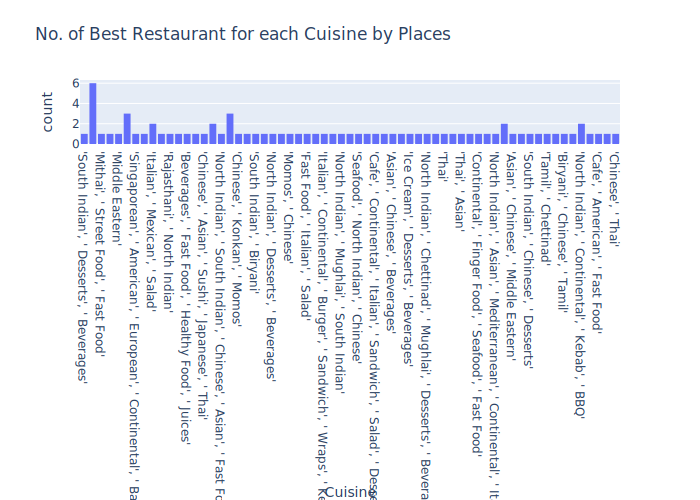

In [24]:
fig = px.histogram(high_dining_rated_df, x='Cuisine',title= 'No. of Best Restaurant for each Cuisine by Places')
fig.show()

## What is the Avg Price Distibution of highest dining rated restaurant for each Cuisine Type in Chennai?

In [25]:
avg_price_dist_df=high_dining_rated_df.groupby(by=['Location','Cuisine']) ['Price for 2'].mean().reset_index()
avg_price_dist_df

,Location,Cuisine,Price for 2
0,Adyar,"'Chinese', ' Thai'",800.0
1,Adyar,'Ice Cream',200.0
2,Adyar,"'North Indian', ' Chettinad', ' Mughlai', ' De...",1800.0
3,Adyar,'South Indian',500.0
4,Alwarpet,"'Desserts', ' Ice Cream'",350.0
...,...,...,...
71,Triplicane,"'South Indian', ' Biryani'",200.0
72,Triplicane,"'South Indian', ' Chinese', ' Street Food', ' ...",400.0
73,Vadapalani,'Japanese',1200.0
74,Velachery,'South Indian',200.0


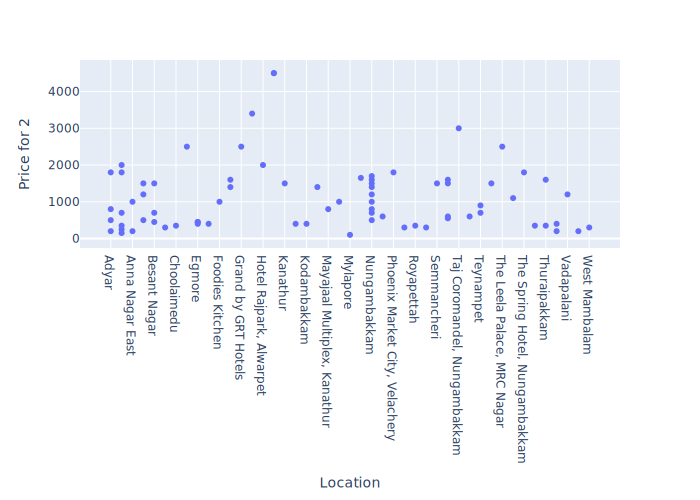

In [26]:
fig=px.scatter(avg_price_dist_df, x="Location", y="Price for 2")
fig.show()

## what are the percentage of restaurants by Delivery Rating  in chennai

In [27]:
del_rating_df=zomato_df["Delivery Rating"].value_counts().reset_index()
del_rating_df

,Delivery Rating,count
0,0.0,5851
1,3.9,1383
2,3.8,701
3,4.0,570
4,3.7,559
5,4.1,468
6,3.6,465
7,4.2,401
8,3.5,314
9,4.3,277


In [28]:
del_rating_df.rename(columns={'count':'Count of Restaurants'},inplace=True)
del_rating_df

,Delivery Rating,Count of Restaurants
0,0.0,5851
1,3.9,1383
2,3.8,701
3,4.0,570
4,3.7,559
5,4.1,468
6,3.6,465
7,4.2,401
8,3.5,314
9,4.3,277


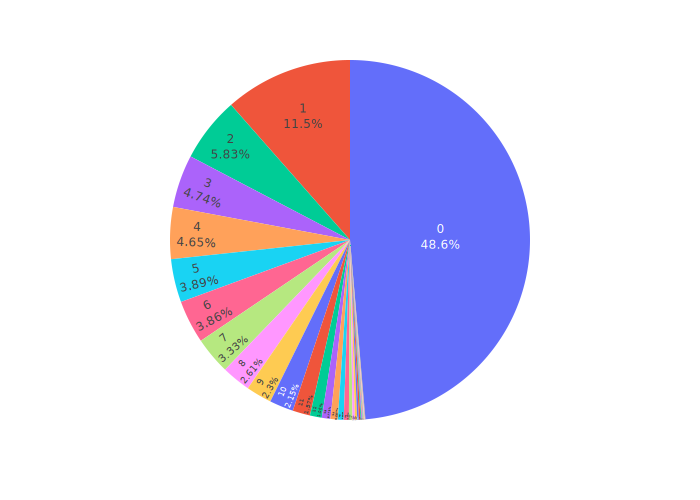

In [29]:
fig1=px.pie(data_frame=del_rating_df,values="Count of Restaurants",color="Delivery Rating").update_traces(textposition='inside',textinfo='percent+label')
fig1.show()

## Which areas have a large number of Chinese Restaurant Market?

In [30]:
chi_df=zomato_df[zomato_df["Cuisine"].str.contains("Chinese")]
chi_df

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"'Biryani', ' North Indian', ' Chinese', ' Arab...","'Brinjal Curry', ' Tandoori Chicken', ' Chicke...",500.0,4.3,1361.0,4.4,10500.0,"'Home Delivery', 'Indoor Seating'"
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"'Chinese', ' Biryani', ' North Indian', ' Chet...","'Mutton Biryani', ' Chicken Rice', ' Tomato Ri...",450.0,4.2,617.0,4.1,22400.0,"'Home Delivery', 'Indoor Seating'"
5,https://www.zomato.com/chennai/dine-n-fun-meda...,Dine N Fun,"Opposite Forest Office, Tambaram Main Road, S...",Medavakkam,"'South Indian', ' North Indian', ' Chinese'","'Chicken Grill', ' Shawarma', ' Naan', ' Chick...",450.0,4.1,567.0,3.8,24700.0,"'Home Delivery', 'Indoor Seating'"
8,https://www.zomato.com/chennai/savoury-sea-she...,Savoury Sea Shell,"3, E Block, 3rd Avenue, Anna Nagar East, Chennai",Anna Nagar East,"'Arabian', ' Chinese', ' North Indian', ' Leba...","'Shawarma', ' Chicken Grill', ' Brownie', ' Se...",1400.0,4.2,2564.0,4.1,21700.0,"'Home Delivery', 'Indoor Seating', 'Card Upon ..."
9,https://www.zomato.com/chennai/sangeetha-veg-r...,Sangeetha Veg Restaurant,"102/82, GN Chetty Road, T. Nagar, Chennai",T. Nagar,"'South Indian', ' North Indian', ' Chinese', '...","'Filtered Coffee', ' Chaat', ' Faluda', ' Masa...",800.0,4.4,1578.0,4.2,39600.0,"'Breakfast', 'Home Delivery', 'Vegetarian Only..."
...,...,...,...,...,...,...,...,...,...,...,...,...
12014,https://www.zomato.com/chennai/bowl-bazaar-adyar,Bowl Bazaar,Delivery Only,Adyar,"'North Indian', ' South Indian', ' Chinese', '...",Invalid,500.0,0.0,0.0,0.0,0.0,'Delivery Only'
12015,https://www.zomato.com/chennai/bowl-bazaar-med...,Bowl Bazaar,Delivery Only,Medavakkam,"'North Indian', ' South Indian', ' Chinese', '...",Invalid,500.0,0.0,0.0,0.0,0.0,'Delivery Only'
12016,https://www.zomato.com/chennai/bowl-bazaar-1-p...,Bowl Bazaar,Delivery Only,Perungudi,"'North Indian', ' South Indian', ' Chinese'",Invalid,400.0,0.0,0.0,0.0,0.0,'Delivery Only'
12017,https://www.zomato.com/chennai/bowl-bazaar-1-m...,Bowl Bazaar,Delivery Only,Medavakkam,"'North Indian', ' South Indian', ' Chinese'",Invalid,400.0,0.0,0.0,0.0,0.0,'Delivery Only'


In [31]:
no_of_chi=chi_df.groupby(by="Location").aggregate({"Name of Restaurant":'count','Price for 2':'mean'}).reset_index()
no_of_chi

,Location,Name of Restaurant,Price for 2
0,"Abu Sarovar Portico, Egmore",1,1000.000000
1,Adambakkam,24,354.166667
2,Adyar,47,608.510638
3,Akkarai,7,942.857143
4,Alandur,12,445.833333
...,...,...,...
205,"Vivanta Chennai, IT Expressway, Sholinganallur",1,1800.000000
206,Washermenpet,30,396.666667
207,"WelcomHotel, RK Salai (Cathedral Road)",1,2200.000000
208,West Mambalam,20,317.500000


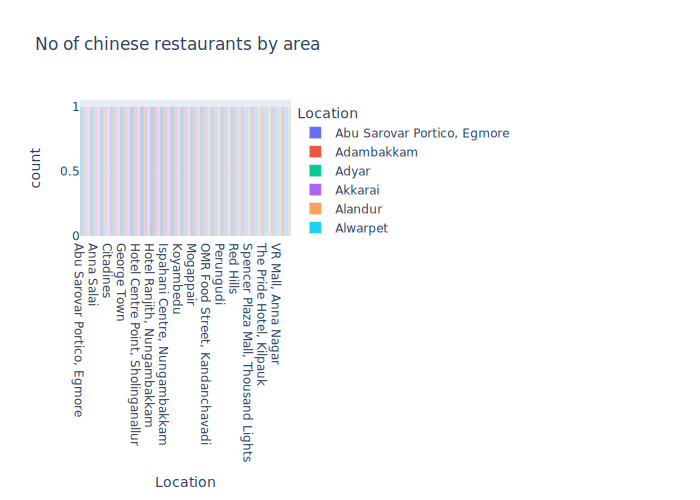

In [32]:
fig=px.bar(no_of_chi, x="Location" ,color="Location",title="No of chinese restaurants by area")
fig.show()


## Find the list of Affordable Restaurants?

In [33]:
#The criteria for Affordable Restaurants would be:-
#1) Low Price
#2) High Rated
#First step will be to find the restaurants with average cost 1/4th the average cost of most expensive restaurant in our dataframe.
#Let me explain:-The most expensive restaurant has an average meal cost= 6000. We'll try to stay economical and only pick the
#restaurants that are 1/4th of 6000.

In [34]:
max_price_of_2 =zomato_df["Price for 2"].max()
max_price_of_2

np.float64(5000.0)

In [35]:
one_fourth_max_price=max_price_of_2/8
one_fourth_max_price

np.float64(625.0)

In [36]:
# Affordable res...
affordable_res=zomato_df[zomato_df["Price for 2"]<375]
affordable_res

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
6,https://www.zomato.com/chennai/bai-veetu-kalya...,Bai Veetu Kalyanam,"1/187, Thalambur Road, Navallur, Chennai",Navallur,'Biryani',"'Bread Halwa', ' Mutton Biryani', ' Brinjal Gr...",350.0,0.0,0.0,4.3,1061.0,'Home Delivery'
12,https://www.zomato.com/chennai/hotel-al-buhari...,Hotel Al Buhari,"81, Opposite AVM Theater, Arcot Road, Vadapal...",Vadapalani,"'Chinese', ' Chettinad'","'Shawarma', ' Fried Rice Chicken', ' Biryani'",350.0,4.0,982.0,3.8,22400.0,"'Home Delivery', 'Indoor Seating'"
15,https://www.zomato.com/chennai/welcome-hotel-p...,Welcome Hotel,"112/241, Purasawalkam High Road, Purasavakkam...",Purasavakkam,"'South Indian', ' Desserts', ' Beverages'","'Pongal', ' Podi Dosa', ' Idli Sambar', ' Vada...",300.0,4.5,1094.0,0.0,0.0,"'Breakfast', 'Vegetarian Only', 'Indoor Seating'"
24,https://www.zomato.com/chennai/eating-circles-...,Eating Circles,"6, CP Ramaswamy Road, Alwarpet, Chennai",Alwarpet,'South Indian',"'Rose Milk', ' Neer Dosa', ' Thatte Idli', ' O...",250.0,4.7,782.0,4.2,2744.0,"'Breakfast', 'Home Delivery', 'Vegetarian Only..."
32,https://www.zomato.com/chennai/shri-balaajee-b...,Shri Balaajee Bhavan,"412/07, Thoraipakam Road Over Bridge, Chromep...",Chromepet,"'South Indian', ' North Indian'","'Filtered Coffee', ' Panneer Butter Masala', '...",300.0,4.3,602.0,4.0,1868.0,"'Breakfast', 'Home Delivery', 'Vegetarian Only..."
...,...,...,...,...,...,...,...,...,...,...,...,...
12027,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Porur,'Sandwich',Invalid,350.0,0.0,0.0,0.0,0.0,"'Breakfast', 'Delivery Only'"
12028,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Kolathur,'Sandwich',Invalid,350.0,0.0,0.0,0.0,0.0,"'Breakfast', 'Delivery Only'"
12029,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Anna Nagar East,'Sandwich',Invalid,350.0,0.0,0.0,0.0,0.0,"'Breakfast', 'Delivery Only'"
12030,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Ramapuram,'Sandwich',Invalid,350.0,0.0,0.0,0.0,0.0,"'Breakfast', 'Delivery Only'"


In [37]:
affordable_res.sort_values(by="Price for 2")

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
4685,https://www.zomato.com/chennai/soda-hub-navallur,Soda Hub,"92, OMR Road, Navallur, Chennai","OMR Food Street, Navallur",'Beverages',Invalid,40.0,3.2,8.0,0.0,0.0,"'Takeaway Only', 'Vegetarian Only', 'Desserts ..."
7405,https://www.zomato.com/chennai/indian-coffee-h...,Indian Coffee House,"33/6, Ritherdon Road, Vepery, Chennai",Vepery,"'Beverages', ' Juices'",Invalid,50.0,0.0,0.0,0.0,0.0,'Takeaway Only'
8355,https://www.zomato.com/chennai/kaafemaa-ambattur,Kaafemaa,"72, Mounasamy Madam Street, Ambattur, Chennai",Ambattur,'Beverages',Invalid,50.0,0.0,0.0,0.0,0.0,'Indoor Seating'
6854,https://www.zomato.com/chennai/planet-soda-per...,Planet Soda,"OMR Food Street - Kandanchavadi, MGR Main Roa...","OMR Food Street, Kandanchavadi","'Beverages', ' Juices'",Invalid,50.0,0.0,0.0,0.0,0.0,"'Desserts and Bakes', 'Outdoor Seating'"
1448,https://www.zomato.com/chennai/mamee-soup-west...,Mamee Soup,"158, Lakeview Road, Station Road, Ramakrishna...",West Mambalam,'Healthy Food',"'Herbal Soup', ' French Onion Soup'",60.0,4.1,115.0,0.0,0.0,"'Vegetarian Only', 'Indoor Seating'"
...,...,...,...,...,...,...,...,...,...,...,...,...
7746,https://www.zomato.com/chennai/nawab-basha-kal...,Nawab Basha Kalesha,"127, Ambattur Red Hills Road, SV Nagar, Vijay...",Oragadam,"'North Indian', ' Chinese', ' Fast Food'",Invalid,350.0,0.0,0.0,0.0,0.0,'Home Delivery'
7737,https://www.zomato.com/chennai/candys-eaters-s...,Candys Eaters Stop,"1, 36-B4, Mount Poonamalle High Road, Chakrap...",St. Thomas Mount,"'Chinese', ' Fast Food', ' Street Food', ' Bev...",Invalid,350.0,0.0,0.0,0.0,0.0,"'Home Delivery', 'Indoor Seating'"
7685,https://www.zomato.com/chennai/hotel-vasanth-v...,Hotel Vasanth Vihaar,"526, Poonamalle High Road, Poonamalle, Chennai",Poonamalle,"'South Indian', ' North Indian', ' Fast Food'",Invalid,350.0,0.0,0.0,0.0,0.0,"'Home Delivery', 'Indoor Seating'"
12031,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Sholinganallur,'Sandwich',Invalid,350.0,0.0,0.0,0.0,0.0,"'Breakfast', 'Delivery Only'"


In [38]:
high_dining_rated_df

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
15,https://www.zomato.com/chennai/welcome-hotel-p...,Welcome Hotel,"112/241, Purasawalkam High Road, Purasavakkam...",Purasavakkam,"'South Indian', ' Desserts', ' Beverages'","'Pongal', ' Podi Dosa', ' Idli Sambar', ' Vada...",300.0,4.5,1094.0,0.0,0.0,"'Breakfast', 'Vegetarian Only', 'Indoor Seating'"
24,https://www.zomato.com/chennai/eating-circles-...,Eating Circles,"6, CP Ramaswamy Road, Alwarpet, Chennai",Alwarpet,'South Indian',"'Rose Milk', ' Neer Dosa', ' Thatte Idli', ' O...",250.0,4.7,782.0,4.2,2744.0,"'Breakfast', 'Home Delivery', 'Vegetarian Only..."
37,https://www.zomato.com/chennai/shree-mithai-ch...,Shree Mithai,"18, Dr TV Road, Chetpet, Chennai",Chetpet,"'Mithai', ' Street Food', ' Fast Food'","'Chaat', ' Badam Milk', ' Pav Bhaji', ' Panipu...",300.0,4.6,1085.0,4.4,18600.0,"'Breakfast', 'Home Delivery', 'Vegetarian Only..."
50,https://www.zomato.com/chennai/andhikkadai-vel...,Andhikkadai,"20, Dhandeeswaram Main Road, Velachery, Chennai",Velachery,'South Indian',"'Coffee', ' Sweet Kozhukattai', ' Idli', ' Pon...",200.0,4.6,908.0,4.2,17300.0,"'Breakfast', 'Home Delivery', 'Vegetarian Only..."
57,https://www.zomato.com/chennai/brownie-heaven-...,Brownie Heaven,"193, Peters Road, Opposite New College, Royap...",Royapettah,"'Bakery', ' Desserts', ' Beverages'","'Vanilla Ice Cream', ' Brownie Shake', ' Filte...",350.0,4.9,842.0,4.3,2270.0,"'Home Delivery', 'Indoor Seating', 'Desserts a..."
...,...,...,...,...,...,...,...,...,...,...,...,...
9279,https://www.zomato.com/chennai/gastronomer-by-...,Gastronomer By Double Roti,"4/27, Cenotaph, 1st Street, Teynampet, Chennai",Teynampet,"'Cafe', ' American', ' Fast Food'","'Burgers', ' Fries', ' Oreo Shake', ' Healthy ...",900.0,4.5,2341.0,4.2,2577.0,"'Home Delivery', 'Indoor Seating', 'Wifi'"
9358,https://www.zomato.com/chennai/writers-cafe-ta...,Writer's Cafe,"1, CSIR Road, Anbazhagan Nagar, MGR Nagar, Ta...",Taramani,"'Cafe', ' American'","'Hot Chocolate', ' Pizza', ' Pasta', ' Waffles...",600.0,4.5,497.0,4.1,360.0,"'Home Delivery', 'Indoor Seating', 'Table book..."
9363,https://www.zomato.com/chennai/flower-drum-adyar,Flower Drum,"2/1, 4th Floor, Near Adyar Signal Junction, A...",Adyar,"'Chinese', ' Thai'","'Momos', ' Noodle', ' Dimsum Platter', ' Schez...",800.0,4.5,617.0,4.3,819.0,"'Home Delivery', 'Wheelchair Accessible', 'Veg..."
9367,https://www.zomato.com/chennai/cream-stone-thu...,Cream Stone,"5, Vinayakam Avenue, Okkiyam, Thuraipakkam, C...",Thuraipakkam,"'Desserts', ' Ice Cream'","'Death By Chocolate', ' Chocolava', ' Tiramisu...",350.0,4.5,683.0,4.2,4553.0,"'Home Delivery', 'Vegetarian Only', 'Indoor Se..."


## Now, we'll merge the aff_rest_df with high_dining_rated_df to obtain the intersection i.e the list of Affordable Restaurants 

In [54]:
high_aff_res = pd.merge(affordable_res, high_dining_rated_df, how='inner', on=['Name of Restaurant', 'Location'])
high_aff_res= high_aff_res[['Zomato URL_x','Address_x', 'Cuisine_x',
'Price for 2_x','Dining Rating_x',"Dining Rating Count_x","Delivery Rating_x"]]
high_aff_res.rename(columns={'Zomato URL_x':'Zomato URL', 'Address_x':'Address', 'Cuisine_x':'Cuisine',
'Price for 2_x':'Price for 2', 'Dining Rating_x':'Dining Rating',"Dining Rating Count_x":"Dining Rating Count","Delivery Rating_x":"Delivery Rating"},inplace=True)

In [55]:
high_aff_res

,Zomato URL,Address,Cuisine,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating
0,https://www.zomato.com/chennai/welcome-hotel-p...,"112/241, Purasawalkam High Road, Purasavakkam...","'South Indian', ' Desserts', ' Beverages'",300.0,4.5,1094.0,0.0
1,https://www.zomato.com/chennai/eating-circles-...,"6, CP Ramaswamy Road, Alwarpet, Chennai",'South Indian',250.0,4.7,782.0,4.2
2,https://www.zomato.com/chennai/shree-mithai-ch...,"18, Dr TV Road, Chetpet, Chennai","'Mithai', ' Street Food', ' Fast Food'",300.0,4.6,1085.0,4.4
3,https://www.zomato.com/chennai/andhikkadai-vel...,"20, Dhandeeswaram Main Road, Velachery, Chennai",'South Indian',200.0,4.6,908.0,4.2
4,https://www.zomato.com/chennai/brownie-heaven-...,"193, Peters Road, Opposite New College, Royap...","'Bakery', ' Desserts', ' Beverages'",350.0,4.9,842.0,4.3
5,https://www.zomato.com/chennai/fruit-shop-on-g...,"11, Greams Road, Thousand Lights, Chennai","'Beverages', ' Fast Food', ' Healthy Food', ' ...",350.0,4.5,609.0,4.6
6,https://www.zomato.com/chennai/rayars-mess-myl...,"31, Arundale Street, Mylapore, Chennai",'South Indian',100.0,4.7,904.0,4.3
7,https://www.zomato.com/chennai/nair-mess-tripl...,"22, Mohammed Abdullah, 2nd Street, Opposite C...","'South Indian', ' Biryani'",200.0,4.5,1038.0,0.0
8,https://www.zomato.com/chennai/the-sandwich-sh...,"1, Subba Street, West Mambalam, Chennai","'Sandwich', ' Fast Food', ' Beverages'",300.0,4.9,584.0,4.4
9,https://www.zomato.com/chennai/momo-sa-khang-b...,"2/247, Perinbavilas Complex, Opposite Chitra ...","'Momos', ' Chinese'",350.0,4.8,1658.0,4.5


In [56]:
#Find the list of most Reliable Restaurants for delivery ?
#Low Price
#High Rated
#Large No Delivery Rating votes...
#First step will be to find the restaurants with Delivery Ratings greater than Mean Delivery Rating

In [57]:
mean_del=zomato_df["Delivery Rating Count"].mean()
mean_del

np.float64(713.4231216755319)

In [58]:
mean_del_res_df = zomato_df[zomato_df["Delivery Rating Count"]>713.42]
mean_del_res_df

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,'Biryani',"'Bread Halwa', ' Chicken 65', ' Mutton Biryani...",500.0,4.3,1500.0,4.3,9306.0,"'Home Delivery', 'Indoor Seating'"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"'Biryani', ' North Indian', ' Mughlai', ' Dess...","'Beef Biryani', ' Beef Fry', ' Paratha', ' Pay...",1000.0,4.4,3059.0,4.1,39200.0,"'Home Delivery', 'Free Parking', 'Table bookin..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"'Biryani', ' North Indian', ' Chinese', ' Arab...","'Brinjal Curry', ' Tandoori Chicken', ' Chicke...",500.0,4.3,1361.0,4.4,10500.0,"'Home Delivery', 'Indoor Seating'"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"'Burger', ' Fast Food', ' Finger Food', ' Beve...",'Zinger Burger',500.0,4.0,1101.0,4.0,11200.0,"'Home Delivery', 'Free Parking', 'Card Upon De..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"'Chinese', ' Biryani', ' North Indian', ' Chet...","'Mutton Biryani', ' Chicken Rice', ' Tomato Ri...",450.0,4.2,617.0,4.1,22400.0,"'Home Delivery', 'Indoor Seating'"
...,...,...,...,...,...,...,...,...,...,...,...,...
11257,https://www.zomato.com/chennai/khichdi-experim...,Khichdi Experiment by Ola Foods,"302, First Floor, Mahatma Gandhi Street, Foun...",Thuraipakkam,"'Healthy Food', ' North Indian'",Invalid,350.0,0.0,0.0,4.2,875.0,'Delivery Only'
11282,https://www.zomato.com/chennai/iyers-delight-k...,Iyer's Delight,"579, Alagirisamy Salai, K.K. Nagar, Chennai",K.K. Nagar,'South Indian',Invalid,250.0,3.5,35.0,3.6,2060.0,"'Breakfast', 'Home Delivery', 'Vegetarian Only..."
11283,https://www.zomato.com/chennai/iyers-delight-v...,Iyer's Delight,"52-6, AVM Avenue, 1st Main Road, Valasaravakk...",Virugambakkam,'South Indian',Invalid,250.0,3.3,25.0,3.9,1617.0,"'Breakfast', 'Home Delivery', 'Indoor Seating'"
11401,https://www.zomato.com/chennai/chai-kanth-alwa...,Chai Kanth,"65, CP Ramaswamy Road, SBI Colony, Alwarpet, ...",Alwarpet,'Beverages',Invalid,200.0,0.0,0.0,4.0,727.0,"'Home Delivery', 'Self Service'"


In [64]:
reliable_res_df= pd.merge(mean_del_res_df, high_aff_res, how='inner')
reliable_res_df

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/eating-circles-...,Eating Circles,"6, CP Ramaswamy Road, Alwarpet, Chennai",Alwarpet,'South Indian',"'Rose Milk', ' Neer Dosa', ' Thatte Idli', ' O...",250.0,4.7,782.0,4.2,2744.0,"'Breakfast', 'Home Delivery', 'Vegetarian Only..."
1,https://www.zomato.com/chennai/shree-mithai-ch...,Shree Mithai,"18, Dr TV Road, Chetpet, Chennai",Chetpet,"'Mithai', ' Street Food', ' Fast Food'","'Chaat', ' Badam Milk', ' Pav Bhaji', ' Panipu...",300.0,4.6,1085.0,4.4,18600.0,"'Breakfast', 'Home Delivery', 'Vegetarian Only..."
2,https://www.zomato.com/chennai/andhikkadai-vel...,Andhikkadai,"20, Dhandeeswaram Main Road, Velachery, Chennai",Velachery,'South Indian',"'Coffee', ' Sweet Kozhukattai', ' Idli', ' Pon...",200.0,4.6,908.0,4.2,17300.0,"'Breakfast', 'Home Delivery', 'Vegetarian Only..."
3,https://www.zomato.com/chennai/brownie-heaven-...,Brownie Heaven,"193, Peters Road, Opposite New College, Royap...",Royapettah,"'Bakery', ' Desserts', ' Beverages'","'Vanilla Ice Cream', ' Brownie Shake', ' Filte...",350.0,4.9,842.0,4.3,2270.0,"'Home Delivery', 'Indoor Seating', 'Desserts a..."
4,https://www.zomato.com/chennai/fruit-shop-on-g...,Fruit Shop On Greams Road,"11, Greams Road, Thousand Lights, Chennai",Thousand Lights,"'Beverages', ' Fast Food', ' Healthy Food', ' ...","'Fruit Juices', ' Sandwich', ' Mint Lime Coole...",350.0,4.5,609.0,4.6,1699.0,"'Home Delivery', 'Vegetarian Only', 'Indoor Se..."
5,https://www.zomato.com/chennai/rayars-mess-myl...,Rayar's Mess,"31, Arundale Street, Mylapore, Chennai",Mylapore,'South Indian',"'Pongal', ' Vada', ' Filtered Coffee', ' Idli'...",100.0,4.7,904.0,4.3,1319.0,"'Breakfast', 'Home Delivery', 'Vegetarian Only..."
6,https://www.zomato.com/chennai/the-sandwich-sh...,The Sandwich Shop,"1, Subba Street, West Mambalam, Chennai",West Mambalam,"'Sandwich', ' Fast Food', ' Beverages'","'Mocktails', ' Fries', ' Pizza Sandwich', ' Ta...",300.0,4.9,584.0,4.4,895.0,"'Home Delivery', 'Vegetarian Only', 'Bulk Orde..."
7,https://www.zomato.com/chennai/momo-sa-khang-b...,Momo Sa-Khang by Kailash Kitchen,"2/247, Perinbavilas Complex, Opposite Chitra ...",Choolaimedu,"'Momos', ' Chinese'","'Momos', ' Noodle', ' Chowmein', ' Fried Momo'...",350.0,4.8,1658.0,4.5,2825.0,"'Home Delivery', 'Free Parking', 'Indoor Seating'"
8,https://www.zomato.com/chennai/royal-sandwich-...,Royal Sandwich Shop,"154, T.T.K Road, Alwarpet, Chennai",Alwarpet,"'Fast Food', ' Desserts', ' Beverages'","'Brownie', ' Cheese Masala Toast', ' Chocolate...",150.0,4.7,1304.0,3.9,11200.0,"'Home Delivery', 'Indoor Seating'"
9,https://www.zomato.com/chennai/cream-stone-alw...,Cream Stone,"253, TTK Road, Near Narada Ghana Sabha, Alwar...",Alwarpet,"'Desserts', ' Ice Cream'","'Death By Chocolate', ' Ferrero Rocher', ' Waf...",350.0,4.5,1208.0,4.0,2552.0,"'Home Delivery', 'Vegetarian Only', 'Sugar Fre..."
